In [1]:
from fastai.vision import * 
from fastai.metrics import error_rate
import os 

In [2]:
bs = 4 #batch size

In [3]:
path_data = os.path.expanduser("~/Datasets/flower_photos")
path_data = "/home/cedricperauer/Datasets/flower_photos" 

print(path_data) #nice

/home/cedricperauer/Datasets/flower_photos


In [4]:
data = ImageDataBunch.from_folder(path_data,ds_tfms =get_transforms(),size=448).normalize(imagenet_stats)

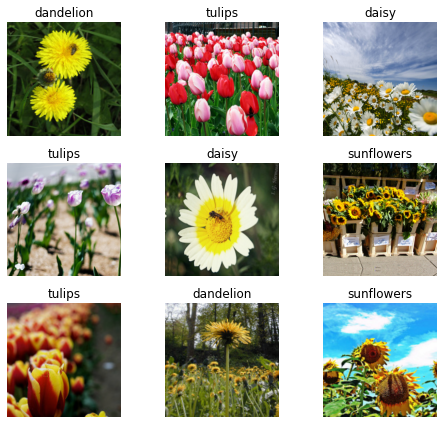

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes) #nice 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [6]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate)

In [7]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [12]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.334446,0.325471,0.086721,00:12
1,0.287721,0.345052,0.100271,00:12
2,0.258418,0.325169,0.100271,00:12
3,0.232560,0.276133,0.084011,00:12
4,0.181247,0.213164,0.081301,00:12
5,0.151291,0.193956,0.075881,00:12
6,0.130786,0.207589,0.062331,00:12
7,0.103687,0.195763,0.065041,00:12
8,0.087034,0.184447,0.065041,00:12
9,0.077797,0.183852,0.065041,00:12


In [13]:
learn.save('stage-10')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses, indeces = interp.top_losses()

len(data.valid_ds)==len(losses)==len(indeces)

True

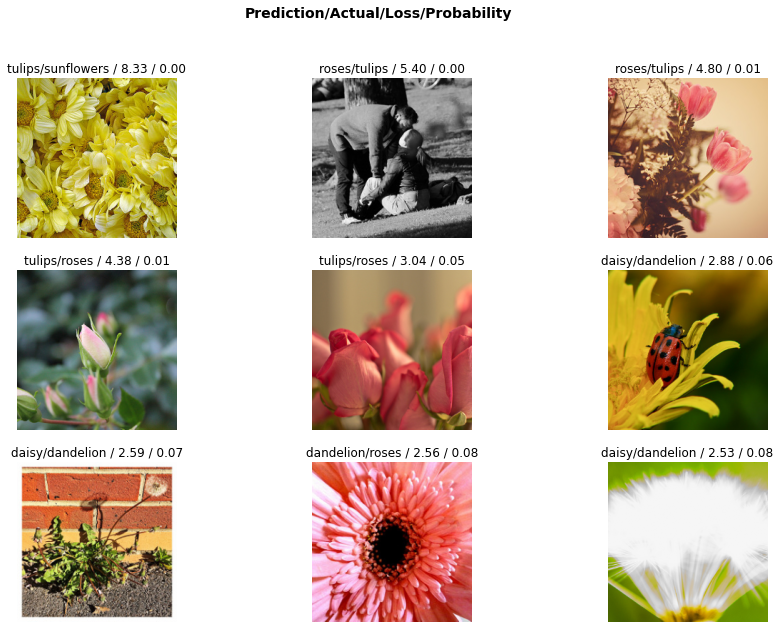

In [17]:
interp.plot_top_losses(9,figsize=(15,10))

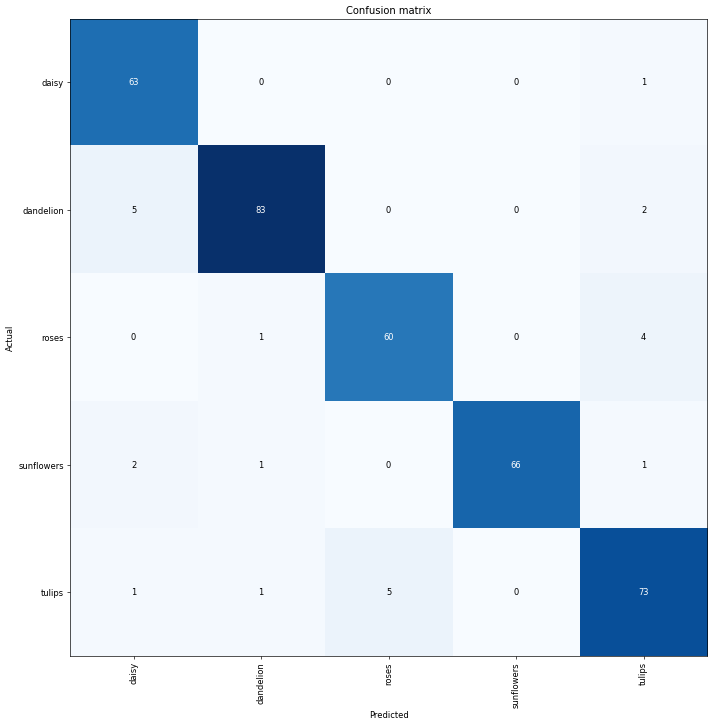

In [18]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [19]:
learner = cnn_learner(data,models.resnet50,metrics=error_rate) 

In [22]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


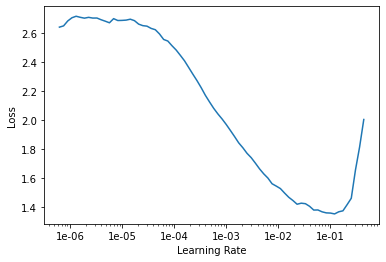

In [24]:
learner.recorder.plot()

In [25]:
learner.fit_one_cycle(2,max_lr = slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.813288,0.351972,0.105691,00:13
1,0.454464,0.325552,0.089431,00:12


In [6]:
learn_mobile = cnn_learner(data,models.mobilenet_v2,metrics=accuracy)

In [7]:
learn_mobile.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 74.00 MiB (GPU 0; 10.76 GiB total capacity; 9.94 GiB already allocated; 24.12 MiB free; 21.22 MiB cached)

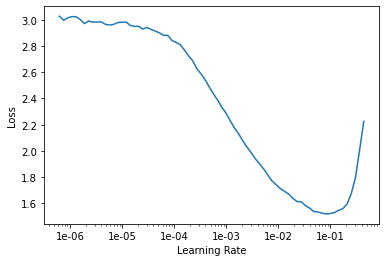

In [35]:
learn_mobile.recorder.plot()

In [36]:
learn_mobile.fit_one_cycle(10,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.399930,0.408240,0.872629,00:09
1,0.733893,0.341152,0.894309,00:09
2,0.501065,0.306978,0.913279,00:09
3,0.373702,0.308627,0.910569,00:10
4,0.288193,0.277003,0.913279,00:09
5,0.219140,0.277046,0.907859,00:09
6,0.170114,0.269814,0.913279,00:09
7,0.130569,0.244135,0.924119,00:09
8,0.102016,0.245115,0.915989,00:09
9,0.097503,0.245982,0.915989,00:09


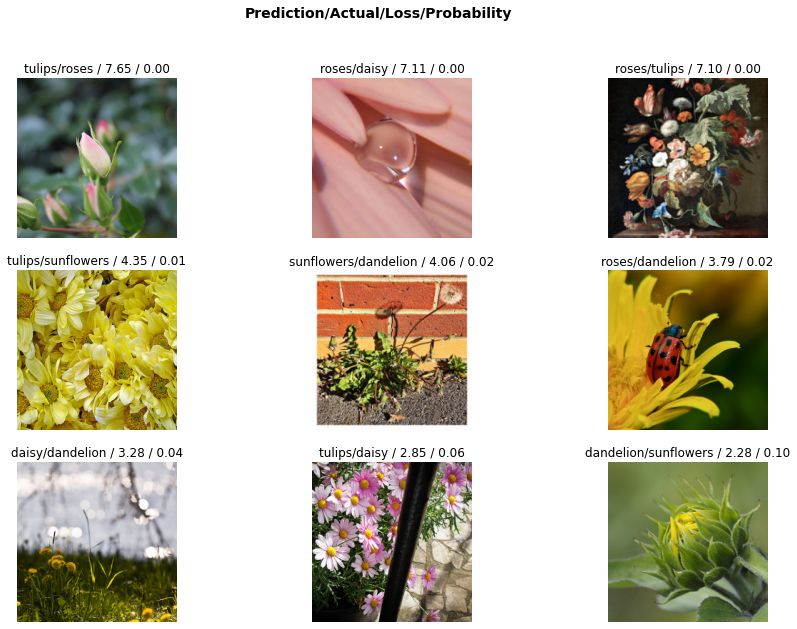

In [31]:
interp = ClassificationInterpretation.from_learner(learn_mobile)

losses, indeces = interp.top_losses()

interp.plot_top_losses(9,figsize=(15,10))

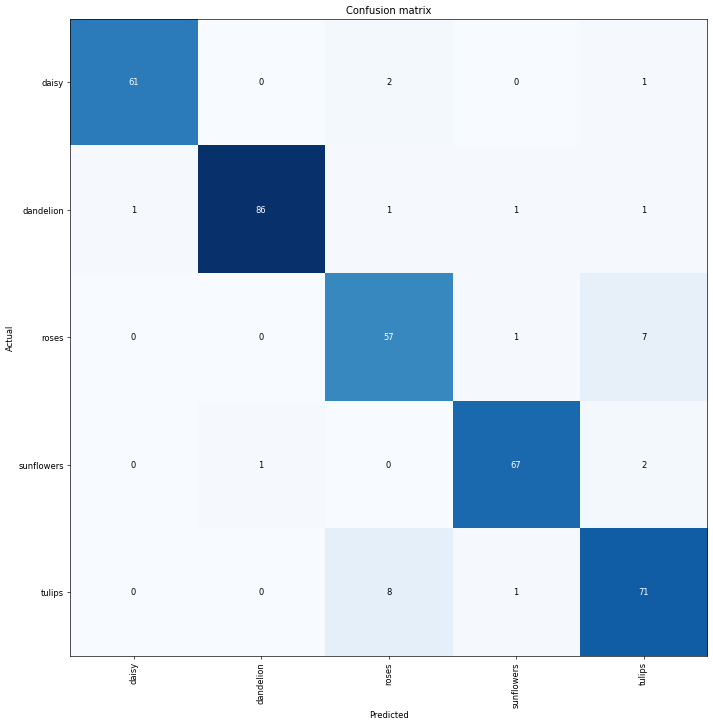

In [32]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60) 